# To find the best fit line for given data using Linear Regression

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Function to plot the given data
def plotData(X, y, x_label='driving_hours', y_label='risk_score'):
    plt.figure(figsize=(6,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(X,y)
    return plt

In [3]:
# Function to plot the regression line along with the given data
def plotRegressionLine(X, y, y_pred, x_label='driving_hours', y_label='risk_score'):
    plt = plotData(X, y, x_label, y_label)
    plt.plot(X, y_pred, color='red', linewidth=3)
    plt.show()

In [4]:
# Function to calculate R2 score
def calcR2Score(X, y, y_pred):
    y_mean = y.mean()
    SStot = sum((y-y_mean)**2)
    SSres = sum((y-y_pred)**2)
    r2_score = 1-(SSres/SStot)
    return r2_score

In [5]:
# Function to calculate Pearson's Correlation Coefficient
def correlationCoef(X,y): 
    X_mean = X.mean()
    y_mean = y.mean()
    num = sum((X-X_mean)*(y-y_mean))
    den = (sum((X-X_mean)**2)*sum((y-y_mean)**2))**0.5
    coef = num/den
    return coef

In [6]:
data = {
    'driving_hours': [10, 9, 2, 15, 10, 16, 11, 16], 
    'risk_score':[95, 80, 10, 50, 45, 98, 38, 93]
} 
df = pd.DataFrame.from_dict(data) 

In [7]:
df.head()

,driving_hours,risk_score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [8]:
X = np.array(df['driving_hours'])
y = np.array(df['risk_score'])

In [9]:
correlationCoef(X,y)

0.6611314653759117

<module 'matplotlib.pyplot' from 'D:\\Program_Files\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

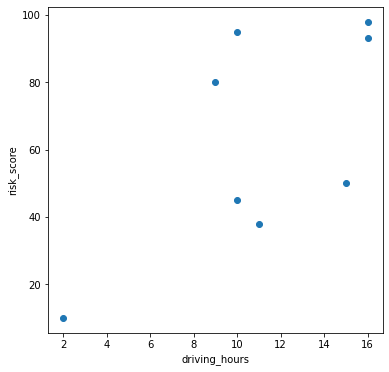

In [10]:
plotData(X, y)

In [11]:
# Function to calculate coefficients of the line
def calcCoefficient(X,y):
    X_mean = X.mean()
    y_mean = y.mean()
    coef = (sum((X-X_mean)*(y-y_mean))/sum((X-X_mean)**2))
    intercept = y_mean - coef*X_mean
    return coef, intercept

Coefficient:  4.58789860997547
Intercept:  12.584627964022893
R2 score:  0.43709481451010035
Equation: Y = 4.58789860997547*X+12.584627964022893


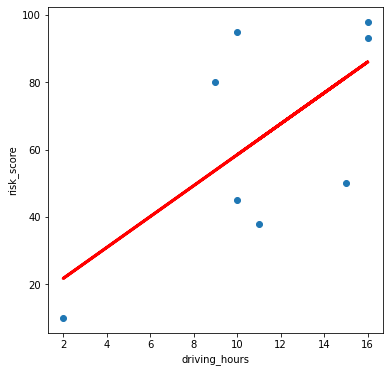

In [12]:
W,W0 = calcCoefficient(X,y)
y_pred = W*X + W0
print("Coefficient: ",W)
print("Intercept: ",W0)
print("R2 score: ",calcR2Score(X, y, y_pred))
print(f"Equation: Y = {W}*X+{W0}")
plotRegressionLine(X, y, y_pred)

## Sklearn implementation
Using Sklearn's LinearRegression api for evaluating the given dataset

In [13]:
X = np.array(X).reshape(-1,1)

Coefficient:  4.587898609975469
Intercept:  12.584627964022907
R2 score:  0.43709481451010035
Equation: Y = 4.587898609975469*X+12.584627964022907


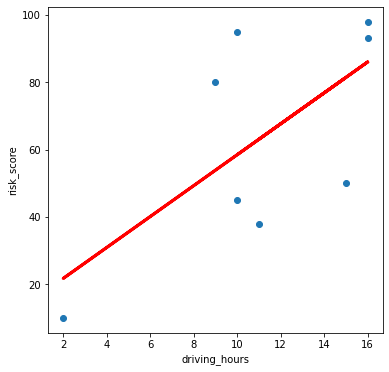

In [14]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print("Coefficient: ",model.coef_[0])
print("Intercept: ",model.intercept_)
print("R2 score: ",calcR2Score(X, y, y_pred))
print(f"Equation: Y = {model.coef_[0]}*X+{model.intercept_}")
plotRegressionLine(X, y, y_pred)